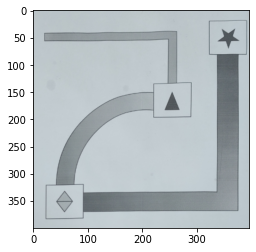

In [5]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
# frame = cv2.imread("Picture1.png")
frame = cv2.imread("Picture3.jpg")
frame = imutils.resize(frame, height=400)
imshow(frame)

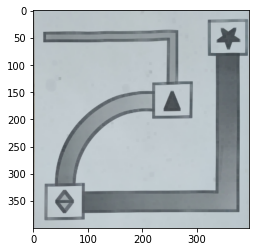

In [6]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(frame,kernel,iterations = 1)
dilation = cv2.dilate(frame,kernel,iterations = 1)
imshow(erosion)

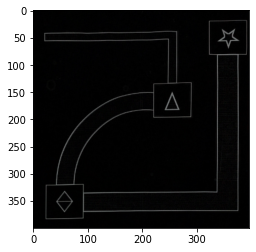

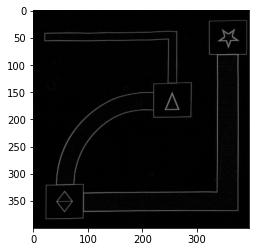

In [7]:
diff = cv2.absdiff(dilation, frame)
imshow(diff)
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
imshow(diff)

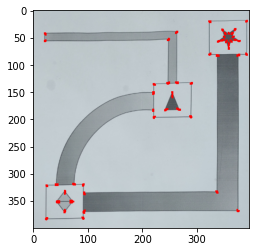

In [8]:
gray = np.float32(diff)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
frame[dst>0.01*dst.max()]=[0,0,255]
imshow(frame)